#                  How to plausibly deny steganographic secrets 

# Welcome to the official GitHub repository for the research paper "How to Plausibly Deny Steganographic Secrets." This repository contains the implementation code referenced in the paper, allowing researchers and enthusiasts to explore and replicate the experiments conducted.

# Disclaimer:

# The code provided in this repository is intended solely for academic and research purposes. It serves as a reference implementation accompanying the research paper "How to Plausibly Deny Steganographic Secrets." The authors do not take any responsibility for the usage or consequences of this code in any other context or application outside the scope of the research paper. Users are advised to exercise caution and comply with legal and ethical guidelines when working with steganographic techniques or handling sensitive data.

In [1]:
#All the datasets are downloaded from Kaggle (https://www.kaggle.com/datasets/melikbekyanashot/faces-dataset) 
#and Linnaeus 5 dataset (http://chaladze.com/l5/)

In [2]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import cv2
from PIL import Image
from numpy import asarray
from skimage.io import imsave
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import PIL
import scipy.misc
from skimage import exposure, img_as_ubyte
import imageio
from keras.preprocessing.image import load_img
import warnings
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import pandas as pd
import os
import random
import glob
from os import listdir
from os.path import isfile, join
from numpy import savez_compressed
from skimage.util import img_as_int
import xlrd
from numpy import save
from numpy import load

# System Initialization
reading pictures from the album and preprocessing them by "freeing up" the space to place steganographic secrets (or random data )

## Reading the Secret Image (S_i)

In [3]:
#secret image of any format jpg, png etc.

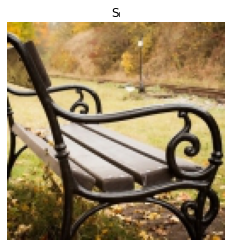

In [4]:
secret = 'C:/Users/.....path....' 
glob.glob(secret)
# Using List Comprehension to read all images
secrets = [imageio.imread(image).astype(np.uint8) for image in glob.glob(secret)]
S_i=random.choice(secrets) #reading secret image(randomly)
plt.imshow(S_i)
plt.axis('off')
plt.title('S\u1D62')
plt.show()

## LSB Removal
This is to get clean images into which we can embed secrets steganographically

In [5]:
#first we create an album of pictures that contains no LSBs. We have used the below code to create such an album
#Uncomment to run the code


#img = Image.open("C:/Users/.....path....")
#pixels = list(img.getdata())
#new_pixels = [(r & 254, g & 254, b & 254) for (r, g, b) in pixels]
#new_img = Image.new(img.mode, img.size)
#new_img.putdata(new_pixels)
#new_img.save("C:/Users.....path....")

# Reading the images from the album (I_c)

In [6]:
file = 'C:/Users/.....path..../*.png' 
glob.glob(file)
images = [imageio.imread(image).astype(np.uint8) for image in glob.glob(file)]
random.shuffle(images)

Enter the number of images (Iᶜ) to be used for creating Residual share (Rᵢ): 5


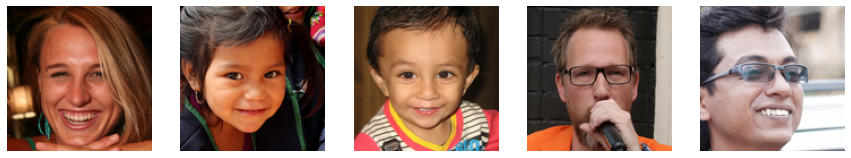

In [7]:
fig=plt.figure(figsize=(15, 15))
rows, cols = 1, int(input("Enter the number of images (I\u1D9C) to be used for creating Residual share (R\u1D62): "))
for j in range(0, cols*rows):
  fig.add_subplot(rows, cols, j+1)
  plt.imshow(images[j])
  plt.axis('off')
plt.show()

# Residual share creation (R_i)
TODO: this should be a part of the "embedding process" of secrets => see below!

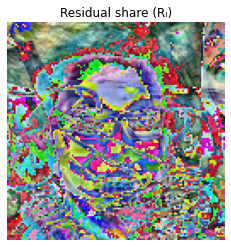

In [8]:
I_c=sum(images[0:cols])
R_i=(S_i-I_c)
plt.imshow(R_i.astype('uint8'))       
plt.axis('off')
plt.title('Residual share (R\u1D62)')
plt.show()

# Saving Residual share (R_i) as an Image

In [9]:
cv2.imwrite('C:/Users/.....path..../residual.png',R_i )

True

# Use of Open Stego

In [15]:
#To embed the residual shares, we have used open stego and embedded the residual share inside the album

In [ ]:
import os                #for checking the current directory
os.getcwd()

In [17]:
 #for changing the directory

In [ ]:
%cd C:/Users/...path....      

In [19]:
!pwd |java -Xmx1024m -jar openstego.jar embed -mf R_i.png -cf 00000.png -sf 00000_r.png   
#here mf stands for message file, cf for cover file and sf for stego file

# Reading of Residual shares

In [20]:
#By using open stego recover the residual shares from the album

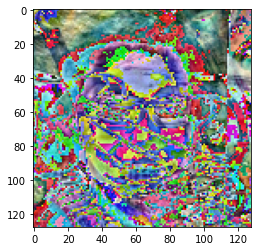

In [24]:
output=np.dstack((r,g,b))
plt.imshow(output)
plt.show()

# Creating the Secret Image (S_i) from Residual shares (R_i) and Image(s)

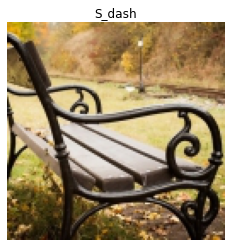

In [25]:
S11=(I_c+output)
S_dash=S11.astype('uint8')
plt.imshow(S_dash)
plt.axis('off')
plt.title('S_dash')
plt.show()

In [26]:
S_dash==S_i      #checking whether the created secret image and the original secret are same or not

Array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       ...,

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,

In [27]:
#The above code is a demo for hiding one secret image; we can hide several other secrets similarly.

# Embedding of Secrets

In [5]:
# TODO: much of the above, like starting from the heading "# Reading the images from the album (I_c)" should actually appear here under this heading that the paper mentions

## Embedding of further secrets
TODO: please "repeat" the insertion of at least two other secrets to demonstrate that multiple secrets can be embedded

In [6]:
# TODO: code here for what we wrote in the paper at "embedding secrets"

#  Extracting the i-th message
here, please extract all three of the above embedded secrets *in different order* to show that the extraction can be done in any form or sequence!

# Deleting a secret m_i
here, show the overwriting of a secret with random data *and verify* that this worked by trying to extract the previously overwritten secret (any of the three secrets embedded previously)

# Updating a secret
like with the deletion, here overwrite the secret (another than the just deleted) with a new secret and demonstrate that it can be extracted.
ALSO: demonstrate that the third (untouched) secret is still extractable, so it was not destroyed by the deletion or updating of the other two images!